<a href="https://colab.research.google.com/github/pretellpo/Introduction-to-Machine-Learning-with-Python/blob/master/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=d15e67ec83cc483ee7d45b110a02bff81060e6961415ea63e7479f92f98dbe06
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

決定木

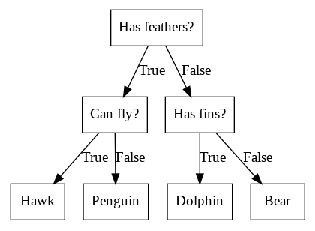

In [6]:
mglearn.plots.plot_animal_tree()

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on training set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on training set: 0.923


In [30]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on training set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on training set: 0.951


In [0]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],
                feature_names=cancer.feature_names,impurity=False,filled=True)

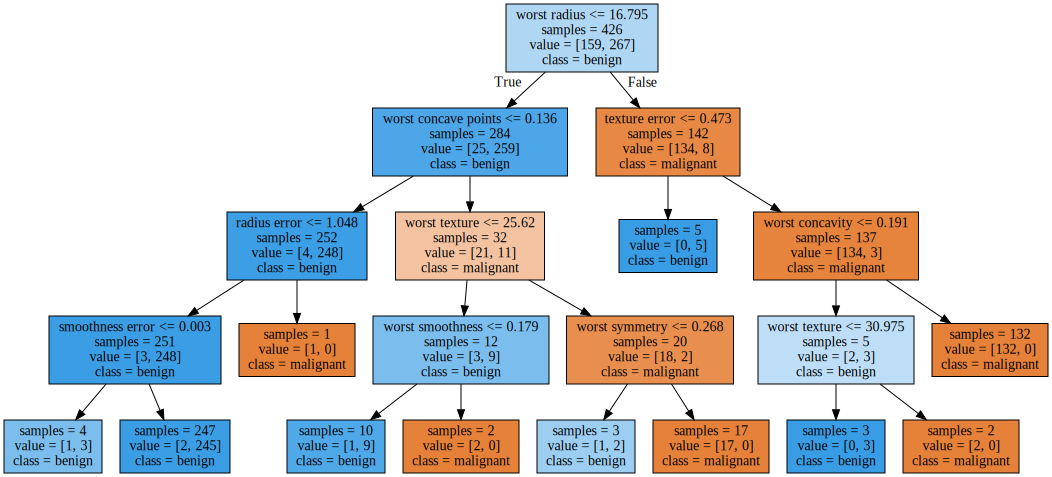

In [32]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [33]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


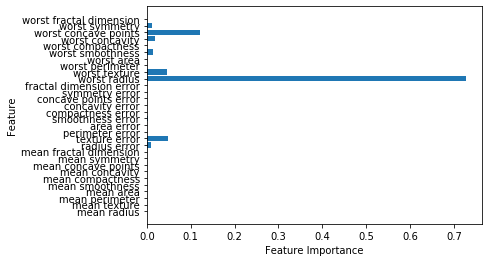

In [38]:
def plot_feature_importances_cancer(model):
  n_features = cancer.data.shape[1]
  plt.barh(range(n_features),model.feature_importances_,align='center')
  plt.yticks(np.arange(n_features),cancer.feature_names)
  plt.xlabel("Feature Importance")
  plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

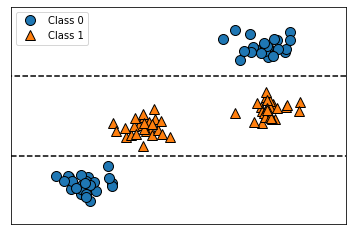

In [39]:
mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in &/Mbyte')

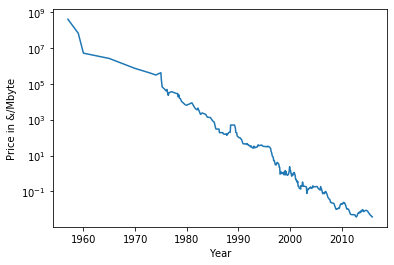

In [42]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in &/Mbyte")

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [58]:
X,y = make_moons(n_samples=100,noise =0.25)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

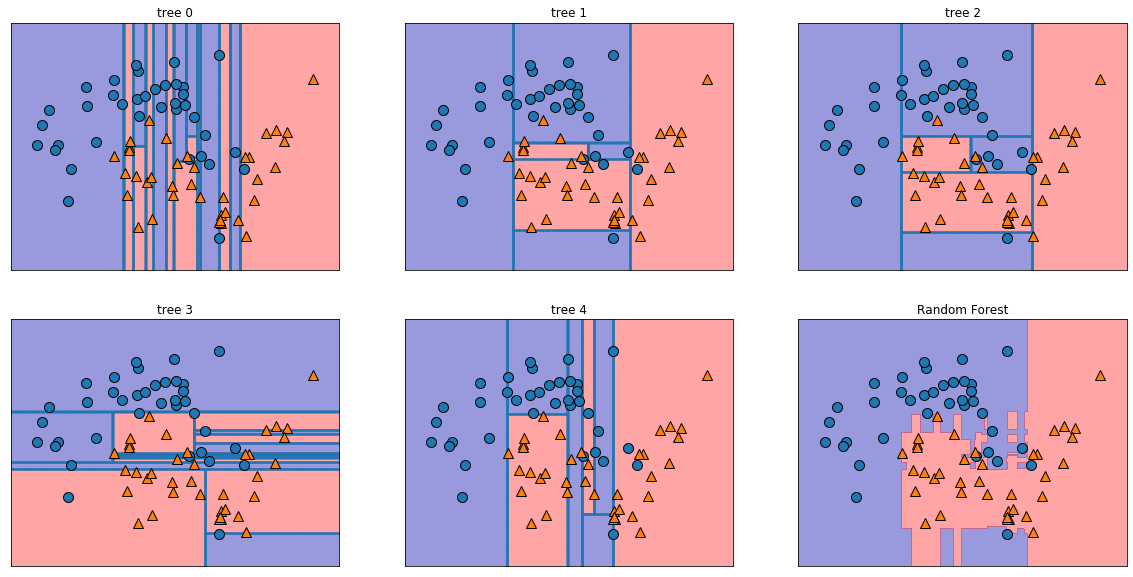

In [59]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
  ax.set_title("tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train,y_train,tree,ax=ax)
mglearn.plots.plot_2d_separator(forest,X_train,fill=True,ax=axes[-1,-1],alpha=.4)
axes[1,-1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)